# Biểu tượng cảm xúc!

Chào mừng bạn đến với nhiệm vụ thứ hai của Tuần 2! Bạn sẽ sử dụng các biểu diễn vector từ để xây dựng một Biểu tượng cảm xúc.
🤩 💫 🔥

Bạn đã bao giờ muốn làm cho tin nhắn văn bản của mình biểu cảm hơn chưa? Ứng dụng biểu tượng cảm xúc sẽ giúp bạn làm điều đó.
Thay vì viết:
> "Chúc mừng chương trình khuyến mãi! Chúng ta hãy uống cà phê và nói chuyện. Yêu các bạn!"

Trình biểu tượng cảm xúc có thể tự động biến điều này thành:
> "Chúc mừng chương trình khuyến mãi! 👍 Cùng uống cà phê và nói chuyện nhé. ☕️ Yêu các bạn! ❤️"

Bạn sẽ triển khai một mô hình nhập một câu (chẳng hạn như "Chúng ta hãy đi xem trận bóng chày tối nay!") Và tìm biểu tượng cảm xúc thích hợp nhất để sử dụng với câu này (⚾️).

### Sử dụng Vectơ Word để Cải thiện Tra cứu Biểu tượng cảm xúc
* Trong nhiều giao diện biểu tượng cảm xúc, bạn cần nhớ rằng ❤️ là biểu tượng "trái tim" chứ không phải là biểu tượng "tình yêu".
    * Nói cách khác, bạn sẽ phải nhớ nhập "trái tim" để tìm biểu tượng cảm xúc mong muốn và nhập "tình yêu" sẽ không hiển thị biểu tượng đó.
* Bạn có thể tạo giao diện biểu tượng cảm xúc linh hoạt hơn bằng cách sử dụng các vectơ từ!
* Khi sử dụng vectơ từ, bạn sẽ thấy rằng ngay cả khi bộ đào tạo của bạn chỉ liên quan rõ ràng một vài từ với một biểu tượng cảm xúc cụ thể, thuật toán của bạn sẽ có thể tổng quát hóa và liên kết các từ bổ sung trong bộ thử nghiệm với cùng một biểu tượng cảm xúc.
    * Điều này hoạt động ngay cả khi những từ bổ sung đó thậm chí không xuất hiện trong tập huấn luyện.
    * Điều này cho phép bạn xây dựng ánh xạ bộ phân loại chính xác từ câu đến biểu tượng cảm xúc, thậm chí sử dụng một bộ đào tạo nhỏ.

### Những gì bạn sẽ xây dựng:
1. Trong bài tập này, bạn sẽ bắt đầu với mô hình cơ sở (Emojifier-V1) bằng cách sử dụng tính năng nhúng từ.
2. Sau đó, bạn sẽ xây dựng một mô hình phức tạp hơn (Emojifier-V2) kết hợp thêm LSTM.

Vào cuối sổ tay này, bạn sẽ có thể:

* Tạo một lớp nhúng trong Keras với các vectơ từ được đào tạo trước
* Giải thích ưu điểm và nhược điểm của thuật toán GloVe
* Mô tả cách lấy mẫu phủ định học vectơ từ hiệu quả hơn các phương pháp khác
* Xây dựng bộ phân loại tình cảm bằng cách sử dụng tính năng nhúng từ
* Xây dựng và đào tạo một bộ phân loại phức tạp hơn bằng cách sử dụng LSTM

🏀 👑

👆 😎

(^^^ Biểu tượng cảm xúc cho "kỹ năng")



## Table of Contents

- [Packages](#0)
- [1 - Baseline Model: Emojifier-V1](#1)
    - [1.1 - Dataset EMOJISET](#1-1)
    - [1.2 - Overview of the Emojifier-V1](#1-2)
    - [1.3 - Implementing Emojifier-V1](#1-3)
        - [Exercise 1 - sentence_to_avg](#ex-1)
    - [1.4 - Implement the Model](#1-4)
        - [Exercise 2 - model](#ex-2)
    - [1.5 - Examining Test Set Performance](#1-5)
- [2 - Emojifier-V2: Using LSTMs in Keras](#2)
    - [2.1 - Model Overview](#2-1)
    - [2.2 Keras and Mini-batching](#2-2)
    - [2.3 - The Embedding Layer](#2-3)
        - [Exercise 3 - sentences_to_indices](#ex-3)
        - [Exercise 4 - pretrained_embedding_layer](#ex-4)
    - [2.4 - Building the Emojifier-V2](#2-4)
        - [Exercise 5 - Emojify_V2](#ex-5)
    - [2.5 - Train the Model](#2-5)
- [3 - Acknowledgments](#3)

<a name='0'></a>
## Packages

Let's get started! Run the following cell to load the packages you're going to use. 

In [ ]:
from google.colab import files
files.upload()

Saving emo_utils.py to emo_utils.py
Saving emojify_data.csv to emojify_data.csv
Saving generateTestCases (1).py to generateTestCases (1).py
Saving tesss.csv to tesss.csv
Saving test_emoji.csv to test_emoji.csv
Saving test_utils.py to test_utils.py
Saving testing.csv to testing.csv
Saving train_emoji.csv to train_emoji.csv


{'emo_utils.py': b'import csv\nimport numpy as np\nimport emoji\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import confusion_matrix\n\ndef read_glove_vecs(glove_file):\n    with open(glove_file, \'r\') as f:\n        words = set()\n        word_to_vec_map = {}\n        for line in f:\n            line = line.strip().split()\n            curr_word = line[0]\n            words.add(curr_word)\n            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)\n        \n        i = 1\n        words_to_index = {}\n        index_to_words = {}\n        for w in sorted(words):\n            words_to_index[w] = i\n            index_to_words[i] = w\n            i = i + 1\n    return words_to_index, index_to_words, word_to_vec_map\n\ndef softmax(x):\n    """Compute softmax values for each sets of scores in x."""\n    e_x = np.exp(x - np.max(x))\n    return e_x / e_x.sum()\n\n\ndef read_csv(filename = \'data/emojify_data.csv\'):\n    phrase = []\n    emoj

In [ ]:
import numpy as np

from emo_utils import *
import emoji
import matplotlib.pyplot as plt
from test_utils import *

%matplotlib inline


<a name='1'> </a>
## 1 - Mô hình cơ sở: Emojifier-V1

<a name='1-1'> </a>
### 1.1 - Tập dữ liệu EMOJISET

Hãy bắt đầu bằng cách xây dựng một bộ phân loại đường cơ sở đơn giản.

Bạn có một tập dữ liệu nhỏ (X, Y) trong đó:
- X gồm 127 câu (chuỗi).
- Y chứa một nhãn số nguyên từ 0 đến 4 tương ứng với một biểu tượng cảm xúc cho mỗi câu.

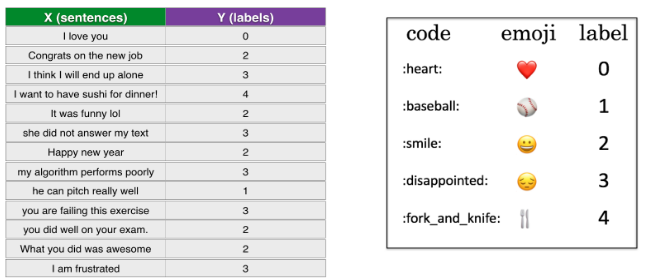

Tải tập dữ liệu bằng cách sử dụng mã bên dưới. Tập dữ liệu được phân chia giữa đào tạo (127 ví dụ) và kiểm tra (56 ví dụ).

In [ ]:
X_train, Y_train = read_csv('/content/drive/MyDrive/Colab Notebooks/data/train_emoji.csv')
X_test, Y_test = read_csv('/content/drive/MyDrive/Colab Notebooks/data/tesss.csv')

In [ ]:
maxLen = len(max(X_train, key=len).split())

Chạy ô sau để in các câu từ X_train và các nhãn tương ứng từ Y_train.
* Thay đổi `idx` để xem các ví dụ khác nhau.
* Lưu ý rằng do phông chữ được sử dụng bởi máy tính xách tay iPython, biểu tượng cảm xúc trái tim có thể có màu đen chứ không phải màu đỏ.

In [ ]:
for idx in range(10):
    print(X_train[idx], label_to_emoji(Y_train[idx]))

never talk to me again 😞
I am proud of your achievements 😄
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴
I love you mum ❤️
Stop saying bullshit 😞
congratulations on your acceptance 😄
The assignment is too long  😞
I want to go play ⚾


<a name='1-2'> </a>
### 1.2 - Tổng quan về Biểu tượng cảm xúc-V1

Trong phần này, bạn sẽ triển khai mô hình cơ sở có tên "Bộ biểu tượng cảm xúc-v1".
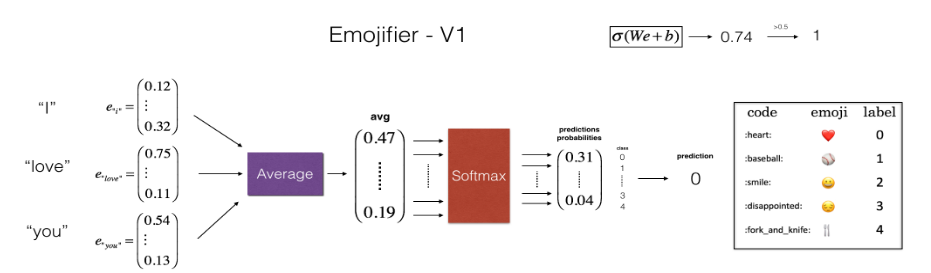

<b> Hình 2 </b>: Mô hình cơ sở (Emojifier-V1). </center> </caption>
</center> </font>


#### Đầu vào và đầu ra
* Đầu vào của mô hình là một chuỗi tương ứng với một câu (ví dụ: "Anh yêu em").
* Đầu ra sẽ là một vectơ xác suất có dạng (1,5), (cho biết có 5 biểu tượng cảm xúc để lựa chọn).
* Vectơ xác suất (1,5) được chuyển đến một lớp argmax, lớp này trích xuất chỉ số của biểu tượng cảm xúc có xác suất cao nhất.

#### Mã hóa một lần
* Để đưa các nhãn của bạn sang định dạng phù hợp cho việc đào tạo bộ phân loại softmax, hãy chuyển đổi $ Y $ từ hình dạng hiện tại của nó $ (m, 1) $ thành "đại diện đơn nhất" $ (m, 5) $,
     * Mỗi hàng là một vectơ nóng cho nhãn của một ví dụ.
     * Ở đây, `Y_oh` là viết tắt của" Y-one-hot "trong các tên biến` Y_oh_train` và `Y_oh_test`:

In [ ]:
Y_oh_train = convert_to_one_hot(Y_train, C = 5)
Y_oh_test = convert_to_one_hot(Y_test, C = 5)

Bây giờ, hãy xem những gì `convert_to_one_hot ()` đã làm. Vui lòng thay đổi `chỉ mục` để in ra các giá trị khác nhau.

In [ ]:
idx = 50
print(f"Sentence '{X_train[50]}' has label index {Y_train[idx]}, which is emoji {label_to_emoji(Y_train[idx])}", )
print(f"Label index {Y_train[idx]} in one-hot encoding format is {Y_oh_train[idx]}")

Sentence 'I missed you' has label index 0, which is emoji ❤️
Label index 0 in one-hot encoding format is [1. 0. 0. 0. 0.]


Tất cả dữ liệu hiện đã sẵn sàng để đưa vào mô hình Emojify-V1. Bạn đã sẵn sàng triển khai mô hình!

<a name='1-3'> </a>
### 1.3 - Triển khai Biểu tượng cảm xúc-V1

Như thể hiện trong Hình 2 (ở trên), bước đầu tiên là:
* Chuyển đổi từng từ trong câu đầu vào thành biểu diễn vector từ của chúng.
* Lấy trung bình cộng của các vectơ từ.

Tương tự như bài tập trước của tuần này, bạn sẽ sử dụng phương pháp nhúng GloVe 50 chiều được đào tạo trước.

Chạy ô sau để tải `word_to_vec_map`, chứa tất cả các biểu diễn vectơ.

In [ ]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('/content/drive/MyDrive/Colab Notebooks/data/glove.6B.50d.txt')

Bạn đã tải:
- `word_to_index`: ánh xạ từ điển từ các từ sang chỉ số của chúng trong từ vựng
     - (400.001 từ, với các chỉ số hợp lệ từ 0 đến 400.000)
- `index_to_word`: ánh xạ từ điển từ các chỉ số đến các từ tương ứng của chúng trong từ vựng
- `word_to_vec_map`: từ điển ánh xạ các từ sang biểu diễn vector GloVe của chúng.

Chạy ô sau để kiểm tra xem nó có hoạt động không:

In [ ]:
word = "cucumber"
idx = 289846
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(idx) + "th word in the vocabulary is", index_to_word[idx])

the index of cucumber in the vocabulary is 113317
the 289846th word in the vocabulary is potatos


<a name='ex-1'> </a>
### Bài tập 1 - sentence_to_avg

Triển khai `sentence_to_avg ()`

Bạn sẽ cần thực hiện hai bước:

1. Chuyển mọi câu thành chữ thường, sau đó chia câu thành một danh sách các từ.
    * `X.lower ()` và `X.split ()` có thể hữu ích. 😉
2. Đối với mỗi từ trong câu, hãy truy cập biểu diễn GloVe của nó.
    * Sau đó lấy giá trị trung bình của tất cả các vectơ từ này.
    * Bạn có thể sử dụng `numpy.zeros ()`, bạn có thể đọc thêm về [tại đây]('https://numpy.org/doc/stable/reference/generated/numpy.zeros.html').
    
    
#### Gợi ý bổ sung
* Khi tạo mảng số không `avg`, bạn sẽ muốn nó là một vectơ có cùng hình dạng với các vectơ từ khác trong` word_to_vec_map`.
    * Bạn có thể chọn một từ tồn tại trong `word_to_vec_map` và truy cập vào trường` .shape` của nó.
    * Hãy cẩn thận không mã hóa từ mà bạn truy cập. Nói cách khác, đừng cho rằng nếu bạn nhìn thấy từ 'the' trong `word_to_vec_map` trong sổ tay này, thì từ này sẽ có trong` word_to_vec_map` khi chức năng đang được gọi bởi máy chấm điểm tự động.

**Gợi ý**: bạn có thể sử dụng bất kỳ một trong các vectơ từ mà bạn đã truy xuất từ ​​đầu vào `sentence` để tìm hình dạng của một vectơ từ.

In [ ]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: sentence_to_avg

def sentence_to_avg(sentence, word_to_vec_map):
    """
    Converts a sentence (string) into a list of words (strings). Extracts the GloVe representation of each word
    and averages its value into a single vector encoding the meaning of the sentence.
    
    Arguments:
    sentence -- string, one training example from X
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    
    Returns:
    avg -- average vector encoding information about the sentence, numpy-array of shape (50,)
    """
    # Get a valid word contained in the word_to_vec_map. 
    any_word = list(word_to_vec_map.keys())[0] #the
    
    ### START CODE HERE ###
    # Step 1: Split sentence into list of lower case words (≈ 1 line)
    words = sentence.lower().split()  #["Morrocan couscous is my favorite dish"]


    # Initialize the average word vector, should have the same shape as your word vectors.
    avg = np.zeros(word_to_vec_map[any_word].shape) # (50,)

 
    # Initialize count to 0
    count = 0
    
    # Step 2: average the word vectors. You can loop over the words in the list "words".
    for w in words: # w is Morrocan couscous is my favorite dish
        # Check that word exists in word_to_vec_map
        if w in  word_to_vec_map:
            avg +=  word_to_vec_map[w]
            # Increment count
            count +=1  
    if count > 0:
        # Get the average. But only if count > 0
        avg = avg/count
    ### END CODE HERE ###
    
    return avg

In [ ]:
avg = sentence_to_avg("Morrocan couscous is my favorite dish", word_to_vec_map)
print("avg = \n", avg)
def sentence_to_avg_test(target):
    # Create a controlled word to vec map
    word_to_vec_map = {'a': [3, 3], 'synonym_of_a': [3, 3], 'a_nw': [2, 4], 'a_s': [3, 2], 
                       'c': [-2, 1], 'c_n': [-2, 2],'c_ne': [-1, 2], 'c_e': [-1, 1], 'c_se': [-1, 0], 
                       'c_s': [-2, 0], 'c_sw': [-3, 0], 'c_w': [-3, 1], 'c_nw': [-3, 2]
                      }
    # Convert lists to np.arrays
    for key in word_to_vec_map.keys():
        word_to_vec_map[key] = np.array(word_to_vec_map[key])
        
    avg = target("a a_nw c_w a_s", word_to_vec_map)
    assert tuple(avg.shape) == tuple(word_to_vec_map['a'].shape),  "Check the shape of your avg array"  
    assert np.allclose(avg, [1.25, 2.5]),  "Check that you are finding the 4 words"
    avg = target("love a a_nw c_w a_s", word_to_vec_map)
    assert np.allclose(avg, [1.25, 2.5]), "Divide between count not len(words)"
    avg = target("love", word_to_vec_map)
    assert np.allclose(avg, [0, 0]), "Average of no words must give an array of zeros"
    avg = target("c_se foo a a_nw c_w a_s deeplearning c_nw", word_to_vec_map)
    assert np.allclose(avg, [0.1666667, 2.0]), "Debug the last example"
    
    print("\033[92mAll tests passed!")

avg = 
 [-0.008005    0.56370833 -0.50427333  0.258865    0.55131103  0.03104983
 -0.21013718  0.16893933 -0.09590267  0.141784   -0.15708967  0.18525867
  0.6495785   0.38371117  0.21102167  0.11301667  0.02613967  0.26037767
  0.05820667 -0.01578167 -0.12078833 -0.02471267  0.4128455   0.5152061
  0.38756167 -0.898661   -0.535145    0.33501167  0.68806933 -0.2156265
  1.797155    0.10476933 -0.36775333  0.750785    0.10282583  0.348925
 -0.27262833  0.66768    -0.10706167 -0.283635    0.59580117  0.28747333
 -0.3366635   0.23393817  0.34349183  0.178405    0.1166155  -0.076433
  0.1445417   0.09808667]


<a name='1-4'> </a>
### 1.4 - Triển khai Mô hình

Bây giờ bạn có tất cả các phần để hoàn thành việc triển khai hàm `model ()`!
Sau khi sử dụng `sentence_to_avg ()`, bạn cần phải:
* Vượt qua mức trung bình thông qua việc truyền về phía trước
* Tính toán chi phí
* Backpropagate để cập nhật các thông số softmax

<a name='ex-2'> </a>
### Bài tập 2 - mô hình

Thực hiện hàm `model ()` được mô tả trong Hình (2).

* Các phương trình bạn cần thực hiện trong chuyển tiếp và để tính chi phí entropy chéo như sau:
* Biến $ Y_ {oh} $ ("Y một nóng") là mã hóa một nóng của các nhãn đầu ra.

$$ z^{(i)} = W . avg^{(i)} + b$$

$$ a^{(i)} = softmax(z^{(i)})$$

$$ \mathcal{L}^{(i)} = - \sum_{k = 0}^{n_y - 1} Y_{oh,k}^{(i)} * log(a^{(i)}_k)$$
**Lưu ý**: Có thể đưa ra cách triển khai vector hiệu quả hơn. Hiện tại, chỉ cần sử dụng các vòng lặp for lồng nhau để hiểu rõ hơn về thuật toán và gỡ lỗi dễ dàng hơn.

Hàm `softmax ()` đã được cung cấp và đã được nhập.

In [ ]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: model

def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):
    """
    Model to train word vector representations in numpy.
    
    Arguments:
    X -- input data, numpy array of sentences as strings, of shape (m, 1)
    Y -- labels, numpy array of integers between 0 and 7, numpy-array of shape (m, 1)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    learning_rate -- learning_rate for the stochastic gradient descent algorithm
    num_iterations -- number of iterations
    
    Returns:
    pred -- vector of predictions, numpy-array of shape (m, 1)
    W -- weight matrix of the softmax layer, of shape (n_y, n_h)
    b -- bias of the softmax layer, of shape (n_y,)
    """
    
    # Get a valid word contained in the word_to_vec_map 
    any_word = list(word_to_vec_map.keys())[0]
        
    # Initialize cost. It is needed during grading
    cost = 0
    
    # Define number of training examples
    m = Y.shape[0]                             # number of training examples
    n_y = len(np.unique(Y))                    # number of classes  
    n_h = word_to_vec_map[any_word].shape[0]   # dimensions of the GloVe vectors 
    
    # Initialize parameters using Xavier initialization
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    # Convert Y to Y_onehot with n_y classes
    Y_oh = convert_to_one_hot(Y, C = n_y) 
    
    # Optimization loop
    for t in range(num_iterations): # Loop over the number of iterations
        for i in range(m):          # Loop over the training examples
            
            ### START CODE HERE ### (≈ 4 lines of code)
            # Average the word vectors of the words from the i'th training example
            avg = sentence_to_avg(X[i], word_to_vec_map)

            # Forward propagate the avg through the softmax layer
            z = np.dot(W,avg)+b
            a = softmax(z)

            # Compute cost using the i'th training label's one hot representation and "A" (the output of the softmax)
            cost = -np.sum(np.multiply(Y_oh[i], np.log(a)))
            ### END CODE HERE ###
            
            # Compute gradients 
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz

            # Update parameters with Stochastic Gradient Descent
            W = W - learning_rate * dW
            b = b - learning_rate * db
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map) #predict is defined in emo_utils.py

    return pred, W, b

In [ ]:
# UNIT TEST
def model_test(target):
    # Create a controlled word to vec map
    word_to_vec_map = {'a': [3, 3], 'synonym_of_a': [3, 3], 'a_nw': [2, 4], 'a_s': [3, 2], 'a_n': [3, 4], 
                       'c': [-2, 1], 'c_n': [-2, 2],'c_ne': [-1, 2], 'c_e': [-1, 1], 'c_se': [-1, 0], 
                       'c_s': [-2, 0], 'c_sw': [-3, 0], 'c_w': [-3, 1], 'c_nw': [-3, 2]
                      }
    # Convert lists to np.arrays
    for key in word_to_vec_map.keys():
        word_to_vec_map[key] = np.array(word_to_vec_map[key])
        
    # Training set. Sentences composed of a_* words will be of class 0 and sentences composed of c_* words will be of class 1
    X = np.asarray(['a a_s synonym_of_a a_n c_sw', 'a a_s a_n c_sw', 'a_s  a a_n', 'synonym_of_a a a_s a_n c_sw', " a_s a_n",
                    " a a_s a_n c ", " a_n  a c c c_e",
                   'c c_nw c_n c c_ne', 'c_e c c_se c_s', 'c_nw c a_s c_e c_e', 'c_e a_nw c_sw', 'c_sw c c_ne c_ne'])
    
    Y = np.asarray([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    
    np.random.seed(10)
    pred, W, b = model(X, Y, word_to_vec_map, 0.0025, 110)
    
    assert W.shape == (2, 2), "W must be of shape 2 x 2"
    assert np.allclose(pred.transpose(), Y), "Model must give a perfect accuracy"
    assert np.allclose(b[0], -1 * b[1]), "b should be symmetric in this example"
    
    print("\033[92mAll tests passed!")
    
model_test(model)

Epoch: 0 --- cost = 0.05105772513207823
Accuracy: 0.9166666666666666
Epoch: 100 --- cost = 0.00970311068897676
Accuracy: 1.0
All tests passed!


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(np.eye(5)[Y_train.reshape(-1)].shape)
print(X_train[0])
print(type(X_train))
Y = np.asarray([5, 0, 0, 5, 4, 4, 4, 6, 6, 4, 1, 1, 5, 6, 6, 3, 6, 3, 4, 4])
print(Y.shape)

X = np.asarray(['I am going to the bar tonight', 'I love you', 'miss you my dear',
 'Lets go party and have drinks','Congrats on the new job','Congratulations',
 'I am so happy for you', 'Why are you feeling bad', 'What is wrong with you',
 'You totally deserve this prize', 'Let us go play football',
 'Are you down for football this afternoon', 'Work hard play harder',
 'It is surprising how people can be dumb sometimes',
 'I am very disappointed','It is the best day in my life',
 'I think I will end up alone','My life is so boring','Good job',
 'Great so awesome'])

print(X.shape)
print(np.eye(5)[Y_train.reshape(-1)].shape)
print(type(X_train))


(132,)
(132,)
(132, 5)
never talk to me again
<class 'numpy.ndarray'>
(20,)
(20,)
(132, 5)
<class 'numpy.ndarray'>


Chạy ô tiếp theo để đào tạo mô hình của bạn và tìm hiểu các tham số softmax (W, b). **Quá trình đào tạo sẽ mất khoảng 5 phút**

In [ ]:
np.random.seed(1)
pred, W, b = model(X_train, Y_train, word_to_vec_map)
print(pred)

Epoch: 0 --- cost = 1.9520498812810076
Accuracy: 0.3484848484848485
Epoch: 100 --- cost = 0.07971818726014807
Accuracy: 0.9318181818181818
Epoch: 200 --- cost = 0.04456369243681402
Accuracy: 0.9545454545454546
Epoch: 300 --- cost = 0.03432267378786059
Accuracy: 0.9696969696969697
[[3.]
 [2.]
 [3.]
 [0.]
 [4.]
 [0.]
 [3.]
 [2.]
 [3.]
 [1.]
 [3.]
 [3.]
 [1.]
 [3.]
 [2.]
 [3.]
 [2.]
 [3.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [4.]
 [3.]
 [3.]
 [4.]
 [0.]
 [3.]
 [4.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [2.]
 [2.]
 [0.]
 [2.]
 [3.]
 [0.]
 [3.]
 [2.]
 [4.]
 [3.]
 [0.]
 [3.]
 [3.]
 [3.]
 [4.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [3.]
 [1.]
 [0.]
 [0.]
 [0.]
 [3.]
 [4.]
 [4.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [0.]
 [3.]
 [3.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [4.]
 [3.]
 [3.]
 [2.]
 [4.]
 [0.]
 [0.]
 [3.]
 [3.]
 [3.]
 [3.]
 [2.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [3.]
 [2.]
 [2.]
 [2.]
 [4.]
 [1.]
 [1.]
 [3.]
 [3.]
 [4.]
 [1.]
 [2.]
 [1.]
 [1.]
 [3.]
 [1.]

Tuyệt quá! Mô hình của bạn có độ chính xác khá cao trên tập huấn luyện. Bây giờ hãy xem nó hoạt động như thế nào trên bộ thử nghiệm:

<a name='1-5'> </a>
### 1.5 - Kiểm tra Hiệu suất Bộ Kiểm tra

Lưu ý rằng hàm `predict` được sử dụng ở đây được định nghĩa trong` emo_util.spy`.

In [ ]:
print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.9772727272727273
Test set:
Accuracy: 0.8571428571428571


**Ghi chú**:
* Đoán ngẫu nhiên sẽ có độ chính xác 20%, vì có 5 lớp. (1/5 = 20%).
* Đây là hiệu suất khá tốt sau khi đào tạo chỉ trên 127 ví dụ.


#### Mô hình đối sánh Biểu tượng cảm xúc với các từ có liên quan
Trong tập huấn luyện, thuật toán thấy câu
> "I love you."

với nhãn ❤️.
* Bạn có thể kiểm tra xem từ "adore" không xuất hiện trong tập huấn luyện.
* Tuy nhiên, hãy xem điều gì sẽ xảy ra nếu bạn viết "I love you."

In [ ]:
X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.8333333333333334

i adore you ❤️
i love you ❤️
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
not feeling happy 😄


Kinh ngạc!
* Bởi vì *adore* có cách nhúng tương tự như *love*, thuật toán đã khái quát hóa chính xác ngay cả với một từ mà nó chưa từng thấy trước đây.
* Các từ như *heart*, *dear*, *beloved* hoặc *adore* có các vectơ nhúng tương tự như *heart*.
     * Vui lòng sửa đổi các đầu vào ở trên và thử nhiều loại câu đầu vào.
     * Nó hoạt động tốt như thế nào?

#### Sắp xếp từ không được xem xét trong Mô hình này
* Lưu ý rằng mô hình không trả lời đúng câu sau:
> "not feeling happy""

* Thuật toán này bỏ qua thứ tự từ, do đó không tốt trong việc hiểu các cụm từ như "not happy".

#### Ma trận hỗn loạn
* In ma trận nhầm lẫn cũng có thể giúp hiểu được lớp nào khó hơn đối với mô hình của bạn.
* Ma trận nhầm lẫn cho biết tần suất một ví dụ có nhãn là một lớp (lớp "actual"") bị thuật toán gắn nhãn sai với một lớp khác (lớp "predict").

In ma trận nhầm lẫn dưới đây:

(56,)
           ❤️    ⚾    😄    😞   🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            6    0    0    1    0    7
1            0    8    0    0    0    8
2            2    0   16    0    0   18
3            1    1    2   12    0   16
4            0    0    1    0    6    7
All          9    9   19   13    6   56


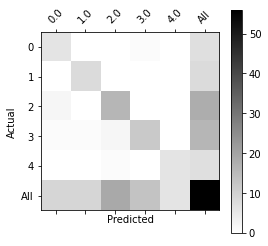

In [ ]:
# START SKIP FOR GRADING
print(Y_test.shape)
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)
# END SKIP FOR GRADING

<font color = 'blue'> <b> Điều bạn nên nhớ: </b>
- Ngay cả khi chỉ với 127 ví dụ đào tạo, bạn có thể có được một mô hình hợp lý tốt cho Biểu tượng cảm xúc.
     - Điều này là do các vector từ sức mạnh tổng quát mang lại cho bạn.
- Emojify-V1 sẽ thể hiện kém hơn đối với những câu như *"Bộ phim này không hay và không thú vị"*
     - Nó không hiểu sự kết hợp của các từ.
     - Nó chỉ tính trung bình của tất cả các vectơ nhúng của các từ lại với nhau, mà không cần xem xét thứ tự của các từ.
</font>
    
**Không phải lo lắng! Bạn sẽ xây dựng một thuật toán tốt hơn trong phần tiếp theo!**

<a name='2'> </a>
## 2 - Emojifier-V2: Sử dụng LSTM trong Keras

Bạn sẽ xây dựng một mô hình LSTM lấy từ **sequences** làm đầu vào! Mô hình này sẽ có thể tính đến thứ tự từ.

Bộ biểu tượng cảm xúc-V2 sẽ tiếp tục sử dụng tính năng nhúng từ đã được đào tạo trước để đại diện cho các từ. Bạn sẽ đưa các phép nhúng từ vào một LSTM và LSTM sẽ học cách dự đoán biểu tượng cảm xúc phù hợp nhất.

In [ ]:
import numpy as np
import tensorflow
np.random.seed(0)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.initializers import glorot_uniform
np.random.seed(1)

<a name='2-1'></a>
### 2.1 - Model Overview

Here is the Emojifier-v2 you will implement:

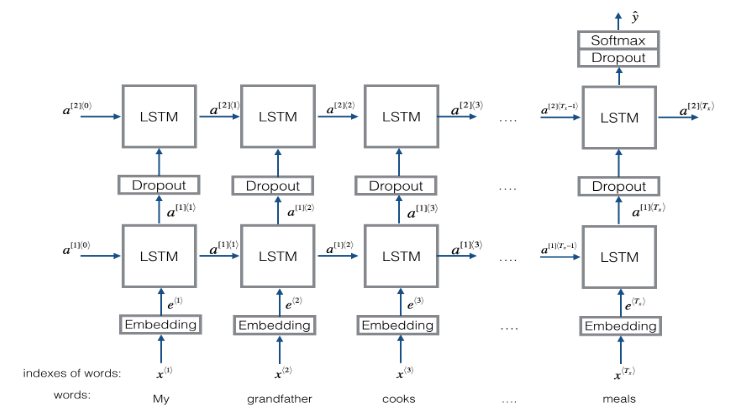

<b>Figure 3</b>: Emojifier-V2. A 2-layer LSTM sequence classifier. </center></caption>

<a name='2-2'> </a>
### 2.2 Keras và Mini-batching

Trong bài tập này, bạn muốn huấn luyện Keras bằng cách sử dụng các lô nhỏ. Tuy nhiên, hầu hết các khuôn khổ học tập sâu đều yêu cầu tất cả các chuỗi trong cùng một lô nhỏ phải có **same length**.

Đây là điều cho phép vectơ hóa hoạt động: Nếu bạn có một câu 3 từ và một câu 4 từ, thì các phép tính cần thiết cho chúng là khác nhau (một câu cần 3 bước của LSTM, một câu cần 4 bước) vì vậy không thể thực hiện được. để thực hiện cả hai cùng một lúc.
    
#### Xử lý đệm Trình tự thay đổi chiều dài
* Giải pháp phổ biến để xử lý các chuỗi có **different length** là sử dụng padding. Đặc biệt:
    * Đặt độ dài trình tự tối đa
    * Pad tất cả các chuỗi để có cùng độ dài.
    
#### Ví dụ về Padding:
* Với độ dài trình tự tối đa là 20, bạn có thể đệm mỗi câu bằng "0" để mỗi câu đầu vào có độ dài 20.
* Do đó, câu "I love you" sẽ được biểu diễn dưới dạng $ (e_ {I}, e_ {love}, e_ {you}, \vec {0}, \vec {0}, \ldots, \vec {0 }) $.
* Trong ví dụ này, bất kỳ câu nào dài hơn 20 từ sẽ phải được cắt bớt.
* Một cách để chọn độ dài chuỗi tối đa là chỉ chọn độ dài của câu dài nhất trong tập huấn luyện.

<a name='2-3'> </a>
### 2.3 - Lớp Nhúng

Trong Keras, ma trận nhúng được biểu diễn dưới dạng "lớp".

* Ma trận nhúng ánh xạ các chỉ số từ sang các vectơ nhúng.
    * Các chỉ số từ là số nguyên dương.
    * Các vectơ nhúng là các vectơ dày đặc có kích thước cố định.
    * Một vectơ "dense" là ngược lại với một vectơ thưa thớt. Nó có nghĩa là hầu hết các giá trị của nó là khác 0. Ví dụ ngược lại, vectơ được mã hóa một nóng không phải là "dense".
* Ma trận nhúng có thể được suy ra theo hai cách:
    * Đào tạo một mô hình để lấy các nhúng từ đầu.
    * Sử dụng phương pháp nhúng được đào tạo trước.
    
#### Sử dụng và Cập nhật Nhúng được đào tạo trước
Trong phần này, bạn sẽ tạo một lớp [Embedding ()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) trong Keras

* Bạn sẽ khởi tạo lớp Nhúng bằng các vectơ 50 chiều GloVe.
* Trong đoạn mã bên dưới, bạn sẽ quan sát cách Keras cho phép bạn đào tạo hoặc để lớp này cố định.
    * Vì tập huấn luyện của bạn khá nhỏ, bạn sẽ để các bản nhúng GloVe cố định thay vì cập nhật chúng.

#### Đầu vào và đầu ra cho Lớp nhúng

* Đầu vào của lớp `Embedding ()` là một ma trận số nguyên có kích thước **(batch size, max input length)**.
     * Đầu vào này tương ứng với các câu được chuyển đổi thành danh sách các chỉ số (số nguyên).
     * Số nguyên lớn nhất (chỉ số từ cao nhất) trong đầu vào không được lớn hơn kích thước từ vựng.
* Lớp nhúng xuất ra một mảng hình dạng (kích thước lô, độ dài đầu vào tối đa, kích thước của vectơ từ).

* Hình bên cho thấy sự lan truyền của hai câu ví dụ thông qua lớp nhúng.
     * Cả hai ví dụ đã được đệm 0 thành độ dài `max_len = 5`.
     * Các từ nhúng có chiều dài 50 đơn vị.
     * Kích thước cuối cùng của biểu diễn là `(2, max_len, 50)`.

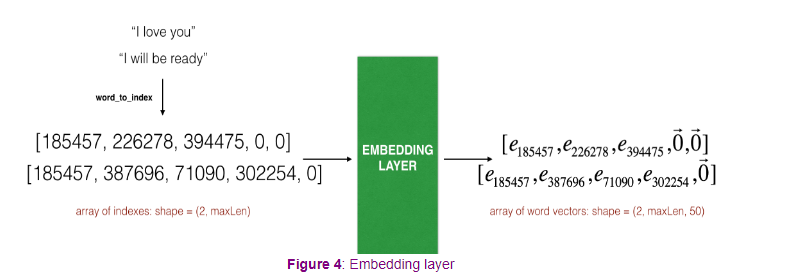

#### Chuẩn bị các câu đầu vào

<a name='ex-3'> </a>
### Bài tập 3 - câu_để_chỉ số

Triển khai ``sentences_to_indices`

Hàm này xử lý một mảng các câu X và trả về các đầu vào cho lớp nhúng:

* Chuyển đổi mỗi câu đào tạo thành một danh sách các chỉ số (các chỉ số tương ứng với mỗi từ trong câu)
* Zero-pad tất cả các danh sách này sao cho độ dài của chúng bằng độ dài của câu dài nhất.
    
#### Gợi ý bổ sung:
* Lưu ý rằng bạn có thể đã cân nhắc việc sử dụng hàm `enumerate ()` trong vòng lặp for, nhưng với mục đích truyền autograder, vui lòng làm theo mã khởi động bằng cách khởi tạo và tăng dần `j` một cách rõ ràng.

In [ ]:
for idx, val in enumerate(["I", "like", "learning"]):
    print(idx, val)

0 I
1 like
2 learning


In [ ]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: sentences_to_indices

def sentences_to_indices(X, word_to_index, max_len):
    """
    Converts an array of sentences (strings) into an array of indices corresponding to words in the sentences.
    The output shape should be such that it can be given to `Embedding()` (described in Figure 4). 
    
    Arguments:
    X -- array of sentences (strings), of shape (m, 1)
    word_to_index -- a dictionary containing the each word mapped to its index
    max_len -- maximum number of words in a sentence. You can assume every sentence in X is no longer than this. 
    
    Returns:
    X_indices -- array of indices corresponding to words in the sentences from X, of shape (m, max_len)
    """
    
    m = X.shape[0]                                   # number of training examples
    ### START CODE HERE ###
    # Initialize X_indices as a numpy matrix of zeros and the correct shape (≈ 1 line)
    X_indices = np.zeros((m, max_len))

    for i in range(m):                               # loop over training examples
        # Convert the ith training sentence in lower case and split is into words. You should get a list of words.
        sentence_words = X[i].lower().split()
        
        # Initialize j to 0
        j = 0
        
        # Loop over the words of sentence_words

        for w in sentence_words :
            # if w exists in the word_to_index dictionary
            if w in word_to_index:
                # Set the (i,j)th entry of X_indices to the index of the correct word.
                X_indices[i, j] = word_to_index[w]
                # Increment j to j + 1
                j =  j+1
            
    ### END CODE HERE ###
    
    return X_indices

In [ ]:
# UNIT TEST
def sentences_to_indices_test(target):
    
    # Create a word_to_index dictionary
    word_to_index = {}
    for idx, val in enumerate(["i", "like", "learning", "deep", "machine", "love", "smile", '´0.=']):
        word_to_index[val] = idx;
       
    max_len = 4
    sentences = np.array(["I like deep learning", "deep ´0.= love machine", "machine learning smile"]);
    indexes = target(sentences, word_to_index, max_len)
    print(indexes)
    
    assert type(indexes) == np.ndarray, "Wrong type. Use np arrays in the function"
    assert indexes.shape == (sentences.shape[0], max_len), "Wrong shape of ouput matrix"
    assert np.allclose(indexes, [[0, 1, 3, 2],
                                 [3, 7, 5, 4],
                                 [4, 2, 6, 0]]), "Wrong values. Debug with the given examples"
    
    print("\033[92mAll tests passed!")
    
sentences_to_indices_test(sentences_to_indices)

(3,)
(3,)
(3,)
[[0. 1. 3. 2.]
 [3. 7. 5. 4.]
 [4. 2. 6. 0.]]
All tests passed!


Chạy ô sau để kiểm tra những gì `sentence_to_indices ()` làm và xem kết quả của bạn.

In [ ]:
X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = sentences_to_indices(X1, word_to_index, max_len=5)
print("X1 =", X1)
print("X1_indices =\n", X1_indices)

(3,)
(3,)
(3,)
X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices =
 [[155345. 225122.      0.      0.      0.]
 [220930. 286375.  69714.      0.      0.]
 [151204. 192973. 302254. 151349. 394475.]]


#### Xây dựng Lớp Nhúng

Bây giờ bạn sẽ xây dựng lớp `` Embedding () 'trong Keras, sử dụng các vectơ từ được đào tạo trước.

* Lớp nhúng nhận làm đầu vào một danh sách các chỉ mục từ.
    * `sentence_to_indices ()` tạo các chỉ mục từ này.
* Lớp nhúng sẽ trả về từ nhúng cho một câu.

<a name='ex-4'> </a>
### Bài tập 4 - Prerained_embedding_layer

Triển khai `prerained_embedding_layer ()` với các bước sau:

1. Khởi tạo ma trận nhúng dưới dạng một mảng số không nhỏ.
    * Ma trận nhúng có một hàng cho mỗi từ duy nhất trong từ vựng.
        * Có một hàng bổ sung để xử lý các từ "unknown".
        * Vì vậy vocab_size là số từ duy nhất cộng với một.
    * Mỗi hàng sẽ lưu trữ biểu diễn vector của một từ.
        * Ví dụ: một hàng có thể dài 50 vị trí nếu sử dụng vectơ từ GloVe.
    * Trong đoạn mã dưới đây, `emb_dim` thể hiện độ dài của một từ nhúng.
2. Điền vào mỗi hàng của ma trận nhúng với biểu diễn vectơ của một từ
    * Mỗi từ trong `word_to_index` là một chuỗi.
    * word_to_vec_map là một từ điển trong đó các khóa là các chuỗi và các giá trị là các vectơ từ.
3. Xác định lớp nhúng Keras.
    * Sử dụng [Embedding ()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding).
    * Kích thước đầu vào bằng độ dài từ vựng (số từ duy nhất cộng với một).
    * Kích thước đầu ra bằng số vị trí trong một từ nhúng.
    * Làm cho các nhúng của lớp này được cố định.
        * Nếu bạn đặt `trainable = True`, thì nó sẽ cho phép thuật toán tối ưu hóa sửa đổi các giá trị của từ nhúng.
        * Trong trường hợp này, bạn không muốn mô hình sửa đổi các từ nhúng.
4. Đặt trọng số nhúng bằng với ma trận nhúng.
    * Lưu ý rằng đây là một phần của mã đã được hoàn thành cho bạn và không cần phải sửa đổi!

In [ ]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: pretrained_embedding_layer

def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    """
    Creates a Keras Embedding() layer and loads in pre-trained GloVe 50-dimensional vectors.
    
    Arguments:
    word_to_vec_map -- dictionary mapping words to their GloVe vector representation.
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    embedding_layer -- pretrained layer Keras instance
    """
    
    vocab_size = len(word_to_index) + 1              # adding 1 to fit Keras embedding (requirement)
    any_word = list(word_to_vec_map.keys())[0]
    emb_dim = word_to_vec_map[any_word].shape[0]    # define dimensionality of your GloVe word vectors (= 50)
      
    ### START CODE HERE ###
    # Step 1
    # Initialize the embedding matrix as a numpy array of zeros.
    # See instructions above to choose the correct shape.
    emb_matrix = np.zeros((vocab_size, emb_dim))
    
    # Step 2
    # Set each row "idx" of the embedding matrix to be 
    # the word vector representation of the idx'th word of the vocabulary
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]

    # Step 3
    # Define Keras embedding layer with the correct input and output sizes
    # Make it non-trainable.
    embedding_layer = Embedding(vocab_size, emb_dim, trainable=False)
    ### END CODE HERE ###

    # Step 4 (already done for you; please do not modify)
    # Build the embedding layer, it is required before setting the weights of the embedding layer. 
    embedding_layer.build((None
                           ,)) # Do not modify the "None".  This line of code is complete as-is.
    
    # Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [ ]:
# UNIT TEST
def pretrained_embedding_layer_test(target):
    # Create a controlled word to vec map
    word_to_vec_map = {'a': [3, 3], 'synonym_of_a': [3, 3], 'a_nw': [2, 4], 'a_s': [3, 2], 'a_n': [3, 4], 
                       'c': [-2, 1], 'c_n': [-2, 2],'c_ne': [-1, 2], 'c_e': [-1, 1], 'c_se': [-1, 0], 
                       'c_s': [-2, 0], 'c_sw': [-3, 0], 'c_w': [-3, 1], 'c_nw': [-3, 2]
                      }
    # Convert lists to np.arrays
    for key in word_to_vec_map.keys():
        word_to_vec_map[key] = np.array(word_to_vec_map[key])
        
    # Create a word_to_index dictionary
    word_to_index = {}
    for idx, val in enumerate(list(word_to_vec_map.keys())):
        word_to_index[val] = idx;
        
    np.random.seed(1)
    embedding_layer = target(word_to_vec_map, word_to_index)
    
    assert type(embedding_layer) == Embedding, "Wrong type"
    assert embedding_layer.input_dim == len(list(word_to_vec_map.keys())) + 1, "Wrong input shape"
    assert embedding_layer.output_dim == len(word_to_vec_map['a']), "Wrong output shape"
    assert np.allclose(embedding_layer.get_weights(), 
                       [[[ 3, 3], [ 3, 3], [ 2, 4], [ 3, 2], [ 3, 4],
                       [-2, 1], [-2, 2], [-1, 2], [-1, 1], [-1, 0],
                       [-2, 0], [-3, 0], [-3, 1], [-3, 2], [ 0, 0]]]), "Wrong vaulues"
    print("\033[92mAll tests passed!")
       
    
pretrained_embedding_layer_test(pretrained_embedding_layer)

All tests passed!


In [ ]:
embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
print("weights[0][1][1] =", embedding_layer.get_weights()[0][1][1])
print("Input_dim", embedding_layer.input_dim)
print("Output_dim",embedding_layer.output_dim)

weights[0][1][1] = 0.39031
Input_dim 400001
Output_dim 50


<a name='2-4'> </a>
### 2.4 - Xây dựng Biểu tượng cảm xúc-V2

Bây giờ bạn đã sẵn sàng xây dựng mô hình Emojifier-V2, trong đó bạn cung cấp đầu ra của lớp nhúng vào mạng LSTM!

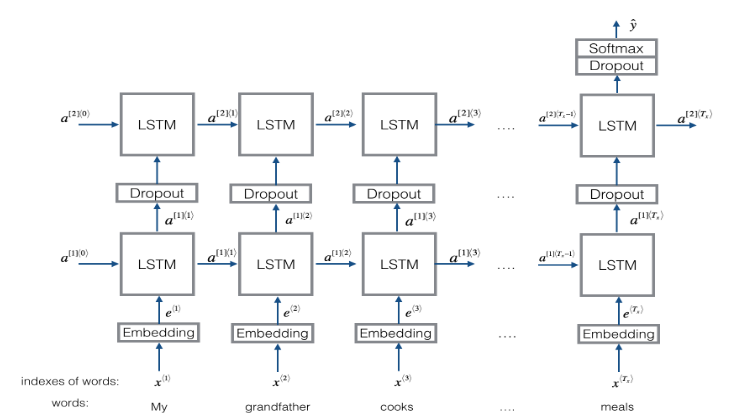

<b> Hình 3 </b>: Biểu tượng cảm xúc-v2. Bộ phân loại trình tự LSTM 2 lớp. </center></caption> </font>


<a name='ex-5'> </a>
### Bài tập 5 - Emojify_V2

Triển khai `Emojify_V2 () '

Hàm này xây dựng một đồ thị Keras của kiến ​​trúc được hiển thị trong Hình (3).

* Mô hình nhận đầu vào là một mảng các câu có dạng (`m`,` max_len`,) được xác định bởi `input_shape`.
* Mô hình xuất ra một vectơ xác suất softmax của hình dạng (`m`,` C = 5`).

* Bạn có thể cần sử dụng các lớp Keras sau:
    * [Inputs ()](https://www.tensorflow.org/api_docs/python/tf/keras/Input)
        * Đặt các tham số `shape` và` dtype`.
        * Các đầu vào là số nguyên, vì vậy bạn có thể chỉ định kiểu dữ liệu là một chuỗi, 'int32'.
    * [LSTM ()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
        * Đặt các tham số `units` và`return_sequences`.
    * [Dropout ()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
        * Đặt tham số `rate`.
    * [Dense ()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
        * Đặt `units`,
        * Lưu ý rằng `Dense ()` có tham số `activation`. Với mục đích chuyển autograder, vui lòng không đặt kích hoạt trong `Dense () '`. Sử dụng lớp `activation` riêng biệt để làm như vậy.
    * [Activation ()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation)
        * Bạn có thể chuyển kích hoạt theo lựa chọn của mình dưới dạng chuỗi chữ thường.
    * [Model ()](https://www.tensorflow.org/api_docs/python/tf/keras/Model)
        * Đặt `inputs` và` outputs`.


#### Gợi ý bổ sung
* Hãy nhớ rằng các lớp Keras này trả về một đối tượng và bạn sẽ cung cấp các kết quả đầu ra của lớp trước đó làm đối số đầu vào cho đối tượng đó. Đối tượng trả về có thể được tạo và gọi trong cùng một dòng.

```Python
# Cách sử dụng các lớp Keras trong hai dòng mã
dense_object = Dense(units = ...)
X = dense_object(inputs)

# Cách sử dụng các lớp Keras trong một dòng mã
X = Dense(units = ...)(inputs)
```

* `Embedding_layer` được trả về bởi` Pretrained_embedding_layer` là một đối tượng lớp có thể được gọi dưới dạng một hàm, truyền vào một đối số duy nhất (chỉ số câu).

```Python
raw_inputs = Input(shape=(maxLen,), dtype='int32')
preprocessed_inputs = ... # some pre-processing
X = LSTM(units = ..., return_sequences= ...)(processed_inputs)
X = Dropout(rate = ..., )(X)
...
X = Dense(units = ...)(X)
X = Activation(...)(X)
model = Model(inputs=..., outputs=...)
...
```

In [ ]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: Emojify_V2

def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    """
    Function creating the Emojify-v2 model's graph.
    
    Arguments:
    input_shape -- shape of the input, usually (max_len,)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    model -- a model instance in Keras
    """
    
    ### START CODE HERE ###
    # Define sentence_indices as the input of the graph.
    # It should be of shape input_shape and dtype 'int32' (as it contains indices, which are integers).
    sentence_indices = Input(input_shape,dtype='int32')
    
    # Create the embedding layer pretrained with GloVe Vectors (≈1 line)
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    # Propagate sentence_indices through your embedding layer
    # (See additional hints in the instructions).
    embeddings = embedding_layer(sentence_indices)   
    
    # Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
    # The returned output should be a batch of sequences.
    X = LSTM(128, return_sequences=True)(embeddings)
    # Add dropout with a probability of 0.5
    X = Dropout(0.5)(X)
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    # The returned output should be a single hidden state, not a batch of sequences.
    X = LSTM(128, return_sequences=False)(X)
    # Add dropout with a probability of 0.5
    X = Dropout(0.5)(X)
    # Propagate X through a Dense layer with 5 units
    X = Dense(5,activation=None)(X)
    # Add a softmax activation
    X = Activation('softmax')(X)
    
    # Create Model instance which converts sentence_indices into X.
    model = Model(sentence_indices, X)
    
    ### END CODE HERE ###
    
    return model

In [ ]:
# UNIT TEST
def Emojify_V2_test(target):
    # Create a controlled word to vec map
    word_to_vec_map = {'a': [3, 3], 'synonym_of_a': [3, 3], 'a_nw': [2, 4], 'a_s': [3, 2], 'a_n': [3, 4], 
                       'c': [-2, 1], 'c_n': [-2, 2],'c_ne': [-1, 2], 'c_e': [-1, 1], 'c_se': [-1, 0], 
                       'c_s': [-2, 0], 'c_sw': [-3, 0], 'c_w': [-3, 1], 'c_nw': [-3, 2]
                      }
    # Convert lists to np.arrays
    for key in word_to_vec_map.keys():
        word_to_vec_map[key] = np.array(word_to_vec_map[key])
        
    # Create a word_to_index dictionary
    word_to_index = {}
    for idx, val in enumerate(list(word_to_vec_map.keys())):
        word_to_index[val] = idx;
        
    maxLen = 4
    model = target((maxLen,), word_to_vec_map, word_to_index)
    
    expectedModel = [['InputLayer', [(None, 4)], 0], ['Embedding', (None, 4, 2), 30], ['LSTM', (None, 4, 128), 67072, (None, 4, 2), 'tanh', True], ['Dropout', (None, 4, 128), 0, 0.5], ['LSTM', (None, 128), 131584, (None, 4, 128), 'tanh', False], ['Dropout', (None, 128), 0, 0.5], ['Dense', (None, 5), 645, 'linear'], ['Activation', (None, 5), 0]]
    comparator(summary(model), expectedModel)
    
    
Emojify_V2_test(Emojify_V2)

All tests passed!


Chạy ô sau để tạo mô hình của bạn và kiểm tra tóm tắt của nó.

* Vì tất cả các câu trong tập dữ liệu có ít hơn 10 từ nên `max_len = 10` đã được chọn.
* Bạn sẽ thấy rằng kiến trúc của bạn sử dụng 20.223.927 tham số, trong đó 20.000.050 (từ nhúng) là không thể đào tạo, với 223.877 còn lại là có thể đào tạo.
* Vì kích thước từ vựng của bạn có 400.001 từ (với các chỉ số hợp lệ từ 0 đến 400.000) nên có 400.001 \* 50 = 20.000.050 tham số không thể đào tạo.

In [ ]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645 

#### Compile the Model 

As usual, after creating your model in Keras, you need to compile it and define what loss, optimizer and metrics you want to use. Compile your model using `categorical_crossentropy` loss, `adam` optimizer and `['accuracy']` metrics:

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<a name='2-5'> </a>
### 2.5 - Đào tạo mô hình

Đã đến lúc đào tạo mô hình của bạn! Mô hình `Emojifier-V2` của bạn nhận làm đầu vào một mảng hình dạng (` m`, `max_len`) và xuất ra các vectơ xác suất của hình dạng (` m`, `số lớp`). Do đó, bạn phải chuyển đổi X_train (mảng câu dưới dạng chuỗi) thành X_train_indices (mảng câu dưới dạng danh sách chỉ số từ) và Y_train (nhãn dưới dạng chỉ số) thành Y_train_oh (nhãn là vectơ một nóng).

In [ ]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 5)

(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)


In [ ]:
model.fit(X_train_indices, Y_train_oh, epochs = 100, batch_size = 32, shuffle=True)

Epoch 1/100
5/5 [==============================] - 34s 7ms/step - loss: 1.6069 - accuracy: 0.1704
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 1.5161 - accuracy: 0.3168
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 1.4705 - accuracy: 0.4095
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 1.3986 - accuracy: 0.4349
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 1.2830 - accuracy: 0.4770
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 1.1862 - accuracy: 0.6029
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 1.1089 - accuracy: 0.5982
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.9123 - accuracy: 0.6946
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.8264 - accuracy: 0.6433
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.7285 - accuracy: 0.7428
Epoch 11/100
5/5 [==========

In [ ]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
2/2 [==============================] - 1s 8ms/step - loss: 0.9111 - accuracy: 0.8214

Test accuracy =  0.8214285969734192


In [ ]:
# This code allows you to see the mislabelled examples
C = 5
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('Expected emoji:'+ label_to_emoji(Y_test[i]) + ' prediction: '+ X_test[i] + label_to_emoji(num).strip())

(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
(56,)
Expected emoji:😄 prediction: he got a very nice raise	❤️
Expected emoji:😄 prediction: she got me a nice present	❤️
Expected emoji:😞 prediction: work is hard	😄
Expected emoji:😞 prediction: This girl is messing with me	❤️
Expected emoji:😞 prediction: work is horrible	😄
Expected emoji:🍴 prediction: any suggestions for dinner	😄
Expected emoji:😄 prediction: you brighten my day	❤️
Expected emoji:😞 prediction: she is a bully	❤️
Expected emoji:😄 prediction: will you be my valentine	❤️
Expected emoji:😞 prediction: go away	⚾


In [ ]:
# Change the sentence below to see your prediction. Make sure all the words are in the Glove embeddings.  
x_test = np.array(['I cannot play'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices))))

(1,)
I cannot play ⚾


#### Tài khoản Phiên bản LSTM cho Thứ tự Word
* Mô hình Emojify-V1 không "cảm thấy hạnh phúc" một cách chính xác, nhưng việc triển khai Emojify-V2 của bạn đã đúng!
     * Nếu không, hãy lưu ý rằng đầu ra của Keras hơi ngẫu nhiên mỗi lần, vì vậy đây có thể là lý do tại sao.
* Mô hình hiện tại vẫn chưa thực sự mạnh mẽ trong việc hiểu phủ định (chẳng hạn như "không hài lòng")
     * Điều này là do tập huấn luyện nhỏ và không có nhiều ví dụ về phủ định.
     * Nếu tập hợp đào tạo lớn hơn, mô hình LSTM sẽ tốt hơn nhiều so với mô hình Emojify-V1 trong việc hiểu các câu phức tạp hơn.

### Xin chúc mừng!
 
Bạn đã hoàn thành sổ tay này và khai thác sức mạnh của LSTM để làm cho lời nói của bạn trở nên cảm xúc hơn! ❤️❤️❤️

Bây giờ, bạn đã:

* Đã tạo một ma trận nhúng
* Đã quan sát cách lấy mẫu phủ định học vectơ từ hiệu quả hơn các phương pháp khác
* Trải nghiệm những ưu điểm và nhược điểm của thuật toán GloVe
* Và đã xây dựng bộ phân loại tình cảm bằng cách sử dụng tính năng nhúng từ!

Mát mẻ! (hoặc Biểu tượng cảm xúc: 😎😎😎)

<font color = 'blue'> <b> Những điều bạn nên nhớ </b>:
- Nếu bạn có một nhiệm vụ NLP trong đó tập huấn luyện nhỏ, việc sử dụng tính năng nhúng từ có thể giúp ích đáng kể cho thuật toán của bạn.
- Nhúng từ cho phép mô hình của bạn hoạt động trên các từ trong tập kiểm tra mà thậm chí có thể không xuất hiện trong tập huấn luyện.
- Các mô hình trình tự đào tạo trong Keras (và trong hầu hết các khuôn khổ học tập sâu khác) yêu cầu một số chi tiết quan trọng:
    - Để sử dụng các lô nhỏ, các trình tự cần phải được ** đệm ** để tất cả các ví dụ trong một lô nhỏ có cùng ** độ dài **.
    - Một lớp `Embedding ()` có thể được khởi tạo với các giá trị được đào tạo trước.
        - Các giá trị này có thể được cố định hoặc được đào tạo thêm trên tập dữ liệu của bạn.
        - Tuy nhiên, nếu tập dữ liệu được gắn nhãn của bạn nhỏ, thì thường không đáng để cố gắng đào tạo một tập hợp nhúng lớn được đào tạo trước.
    - `LSTM ()` có một cờ gọi là `return_sequences` để quyết định xem bạn muốn trả lại mọi trạng thái ẩn hay chỉ trả về trạng thái cuối cùng.
    - Bạn có thể sử dụng `Dropout () 'ngay sau` LSTM ()' để chính thức hóa mạng của mình.

### Input sentences:
```Python
"Congratulations on finishing this assignment and building an Emojifier."
"We hope you're happy with what you've accomplished in this notebook!"
```
### Output emojis:
# 😀😀😀😀😀😀

☁ 👋🚀 ☁☁

      ✨ BYE-BYE!
      
☁ ✨  🎈

      ✨  ☁
  
         ✨
 
     ✨
 
🌾✨💨 🏃 🏠🏢                    